In [2]:
# Импортируем необходимые библиотеки

import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv(path.join('data', 'Monthly gasoline demand Ontario gallon millions 1960  1975.csv'), index_col=0)

df.head()

,x
1,87695
2,86890
3,96442
4,98133
5,113615


In [4]:
df.describe()

,x
count,192.000000
mean,162063.682292
std,41661.872770
min,86890.000000
25%,128425.500000
50%,157459.000000
75%,193555.750000
max,255918.000000


In [5]:
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1 )

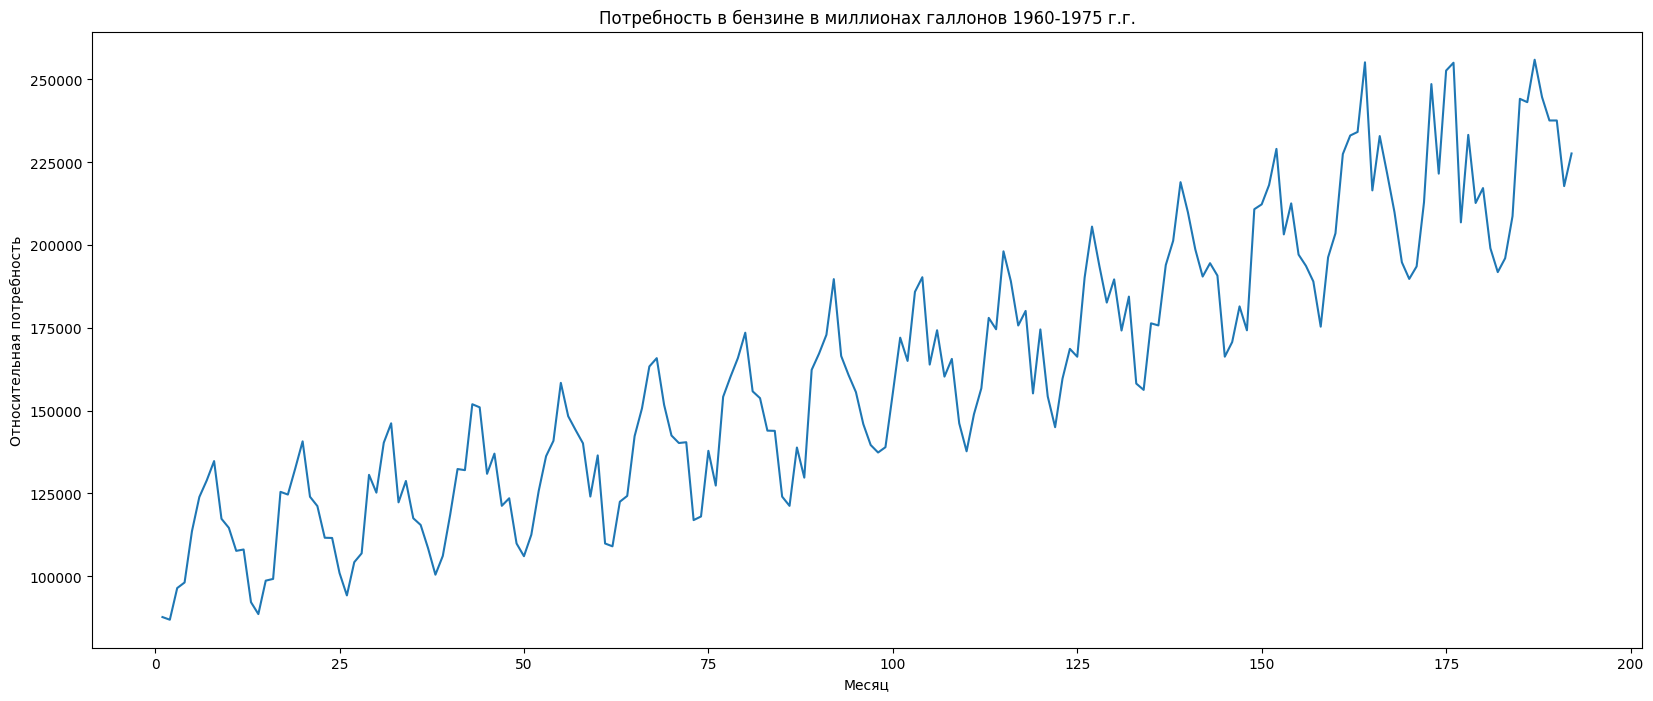

In [6]:
fig, axs = plt.subplots(1, 1 ,figsize=(20, 8))
plot_assignation(axs, df, 'Месяц', 'Относительная потребность', 'Потребность в бензине в миллионах галлонов 1960-1975 г.г.')


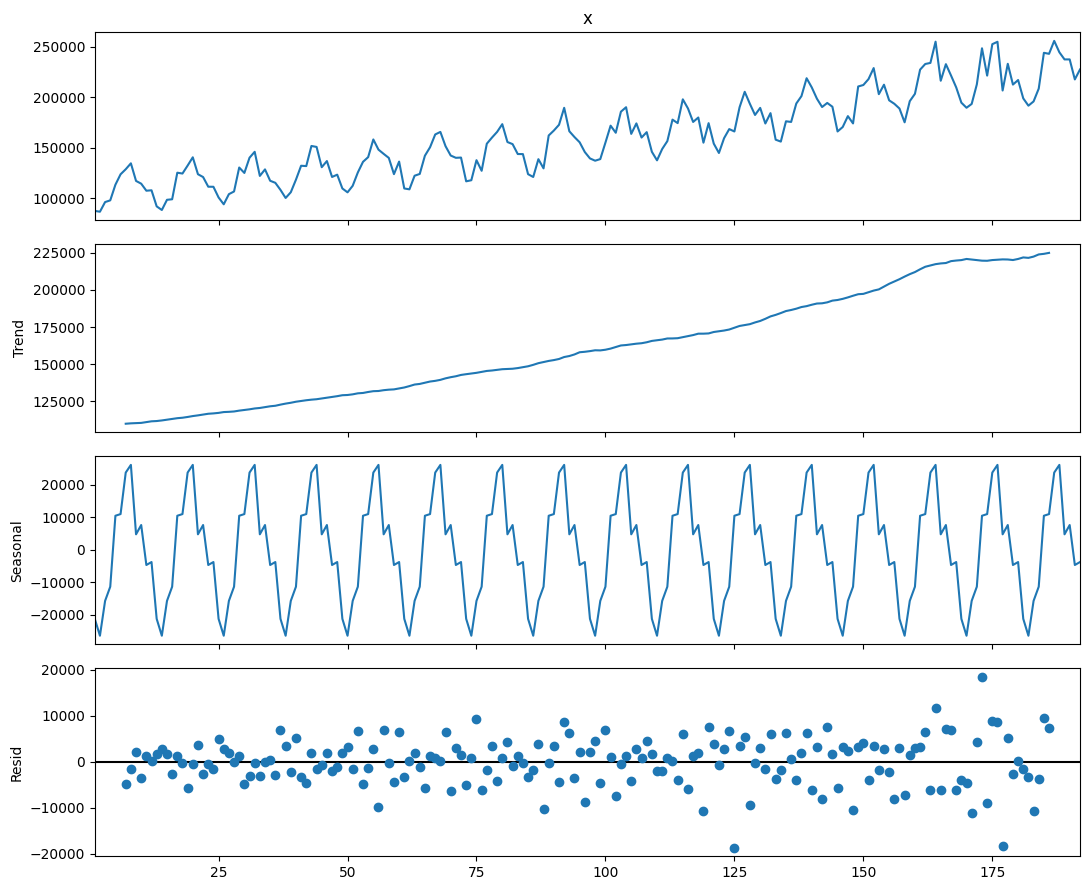

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose


from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

# Аддитивный ряд
decompose_additive = seasonal_decompose(df["x"], model="additive", period=12)
decompose_additive.plot()
plt.show()

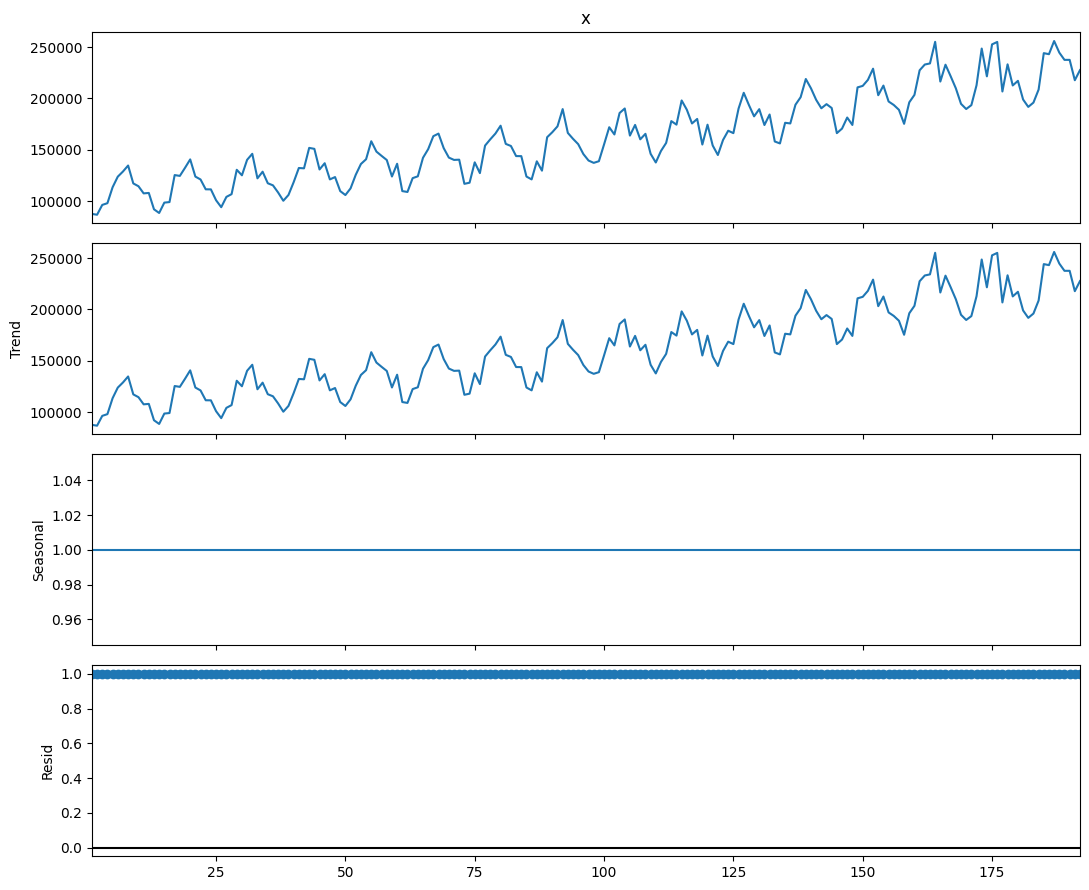

In [8]:
# Мультипликативный ряд
decompose_additive = seasonal_decompose(df["x"], model="multiplicative", period=1)
decompose_additive.plot()
plt.show()

In [9]:
import numpy as np
# Заменяем 0 на None, затем удаляем все None
df_without_null = df.replace(0, np.nan).dropna()

In [10]:
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 1 to 192
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       192 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


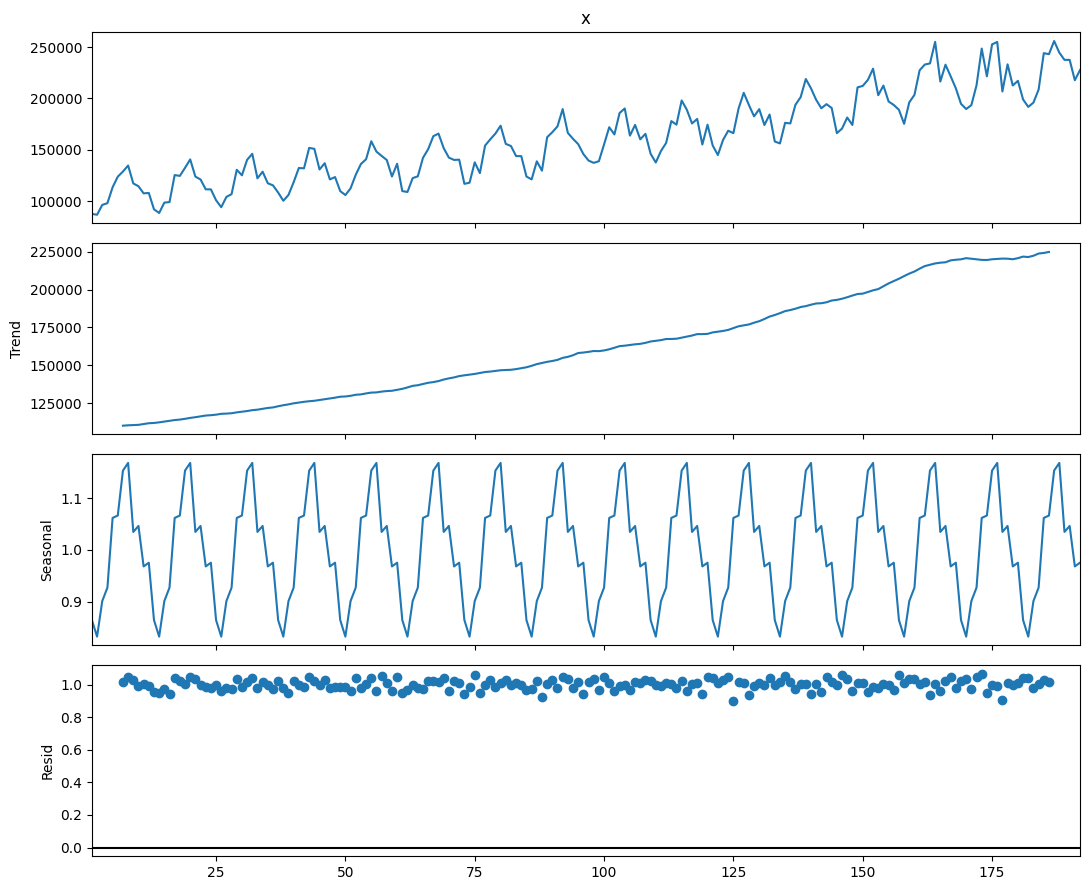

In [11]:
# Мультипликативный ряд
decompose_multiplicative = seasonal_decompose(df_without_null["x"], model="multiplicative", period=12)
decompose_multiplicative.plot()
plt.show()

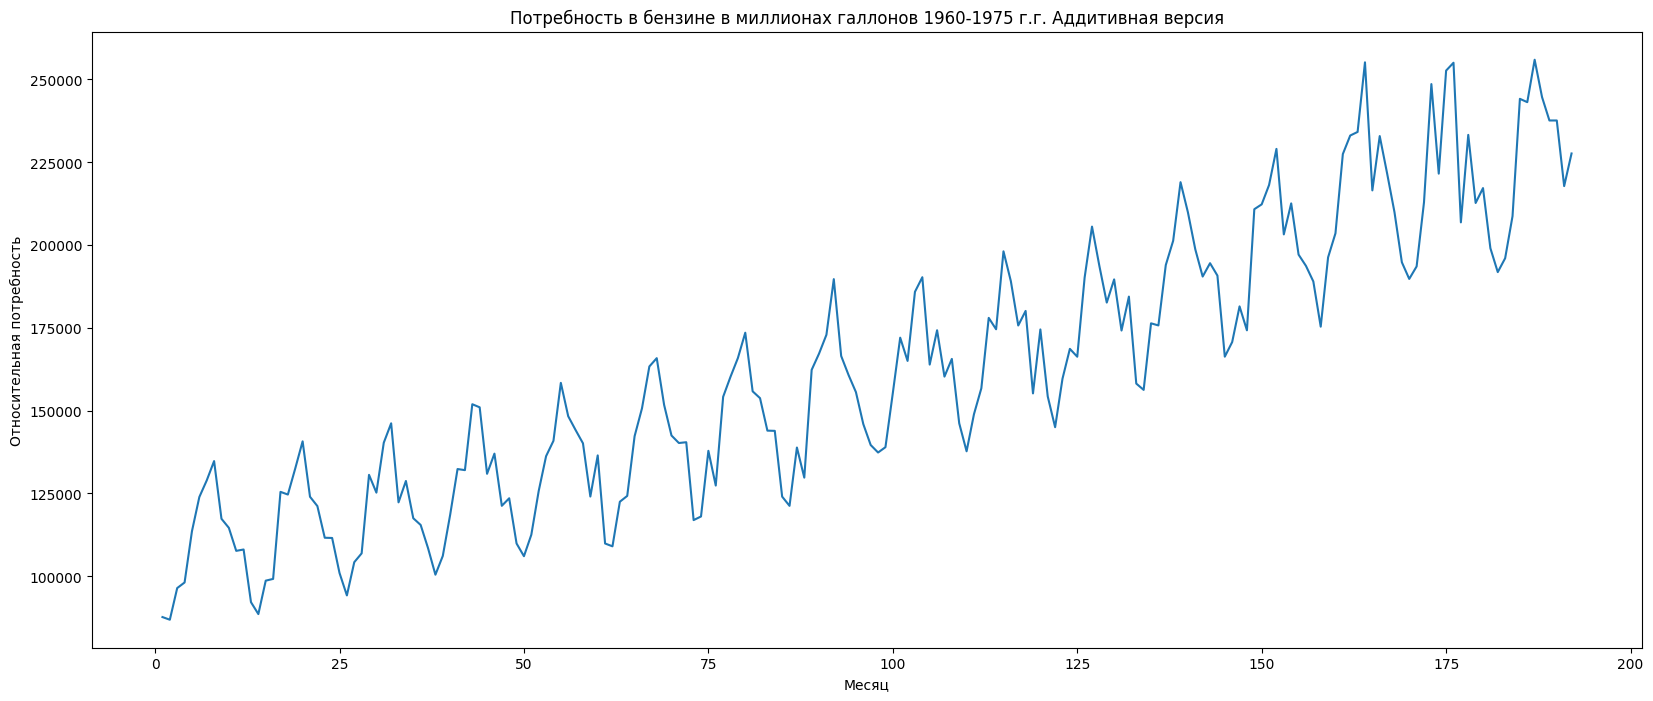

In [12]:
# Сбор аддитивного ряда

additive_series = decompose_additive.trend + decompose_additive.seasonal + decompose_additive.resid

fig, axs = plt.subplots(1, 1 ,figsize=(20, 8))
plot_assignation(axs, additive_series, 'Месяц', 'Относительная потребность', 'Потребность в бензине в миллионах галлонов 1960-1975 г.г. Аддитивная версия')

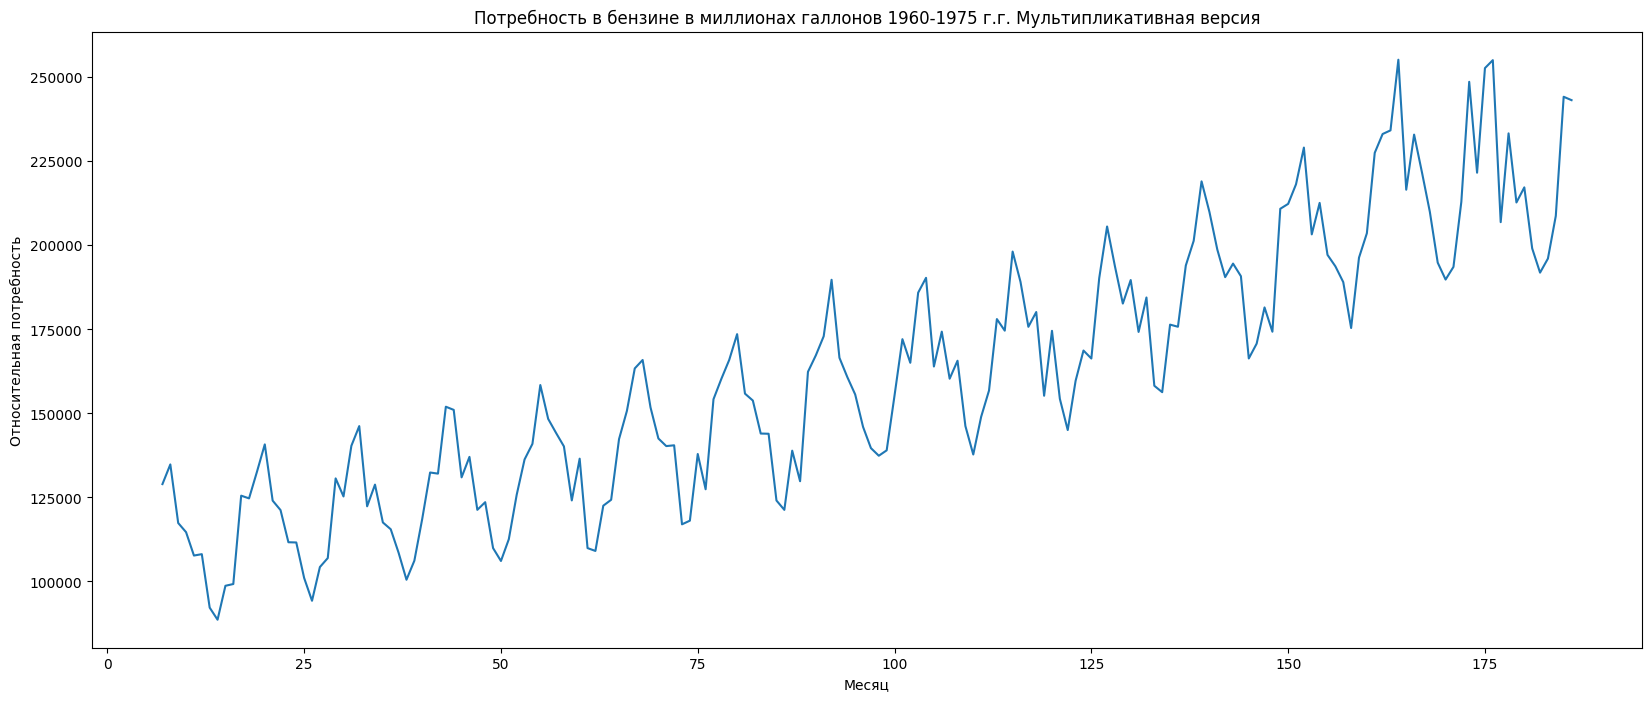

In [13]:
# Сбор мультипликативного ряда

multiplicative_series = decompose_multiplicative.trend * decompose_multiplicative.seasonal * decompose_multiplicative.resid

fig, axs = plt.subplots(1, 1 ,figsize=(20, 8))
plot_assignation(axs, multiplicative_series, 'Месяц', 'Относительная потребность', 'Потребность в бензине в миллионах галлонов 1960-1975 г.г. Мультипликативная версия')

In [14]:
# Проверка на стационарность тестом Дики-Фуллера

from statsmodels.tsa.stattools import adfuller


alpha = 0.05
name = "Солнечные пятна"
ts = df["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Солнечные пятна :
Test Statistic                   0.584705
p-value                          0.987232
#Lags Used                      15.000000
Number of Observations Used    176.000000
Critical Value (1%)             -3.468062
Critical Value (5%)             -2.878106
Critical Value (10%)            -2.575602
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


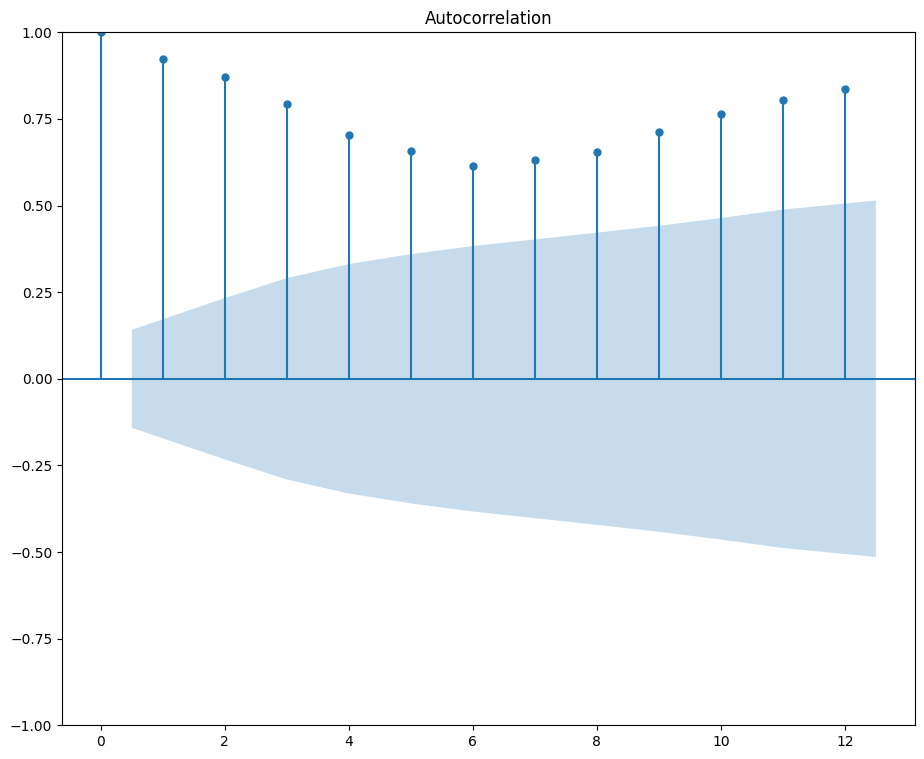

In [15]:
# Построение автокореляции и коррелограммы

import statsmodels.tsa.api as smt

ts = df["x"]

ac_plot = smt.graphics.plot_acf(ts, lags=12)